In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'
plt.rcParams['axes.facecolor'] = 'black'

In [2]:
obs = 15
np.random.seed(15)
data = np.random.randint(0,5, obs*5).reshape(obs,5)
data_unique = np.unique(data, axis=0)
xs = np.c_[np.ones([data_unique.shape[0]]), data_unique] 
xs.shape

(15, 6)

In [3]:
xs[:4]

array([[1., 0., 3., 0., 4., 3.],
       [1., 0., 3., 2., 4., 2.],
       [1., 0., 4., 0., 4., 3.],
       [1., 0., 4., 4., 4., 3.]])

In [4]:
ys = np.random.choice(list(range(1,10)), obs)
ys.resize(obs,1)
ys[:4]

array([[5],
       [3],
       [3],
       [4]])

In [5]:
weights = np.random.randn

In [6]:
ins = 5
outs = 1
lr = .0001

w0 = weights(ins+1, 10)
w1 = weights(10, 5) 
w2 = weights(5, outs)
err = []

In [7]:
xs.shape, w0.shape, w1.shape, w2.shape, ys.shape

((15, 6), (6, 10), (10, 5), (5, 1), (15, 1))

In [8]:
for i in range(50000):
    x0 = xs
    
    #Forward Propagation
    z0 = x0 @ w0; x1 = np.sin(z0)
    z1 = x1 @ w1; x2 = np.sin(z1)
    yh = (x2 @ w2)    
    
    #Backward Propagation
    e  = (yh - ys) * 1
    e2 = (e)
    e1 = (e2 @ w2.T) * np.cos(z1)
    e0 = (e1 @ w1.T) * np.cos(z0)
    
    #Update path
    w2 -= (x2.T @ e2) * lr
    w1 -= (x1.T @ e1) * lr
    w0 -= (x0.T @ e0) * lr 
    
    e  = np.sum(np.abs(e))
    
    if e < .01:
        print('we have converged after {} iterations'.format(i))
        print(w1)
        break
    err.append(e)

we have converged after 11929 iterations
[[ 2.43985097  1.16830891 -1.44745695  0.86493321  1.26882197]
 [ 1.00521595 -1.01014731  0.0947115  -0.83587586 -0.1820947 ]
 [ 0.02996627 -0.25502379  0.51269081 -0.1355581  -0.77634577]
 [ 0.81497228  0.14684297 -1.76302378  0.5869561  -0.20506779]
 [-2.33872655  0.55547664  0.53567396 -2.27533495 -0.83846522]
 [-0.03856588  2.26979652 -0.51112829 -1.08177426  0.80527565]
 [-0.50322047  1.07034327  1.22661407 -0.02011397 -0.18681702]
 [ 0.32185944 -0.71379944 -0.68046048 -0.88539601  0.16546465]
 [ 0.78524332  2.2764891   0.97353658  1.05765737  1.64730891]
 [ 0.83949008  0.95608885 -0.33503995  0.57697023  1.42106336]]


In [9]:
len(err), min(err)

(11929, 0.010004464123882228)

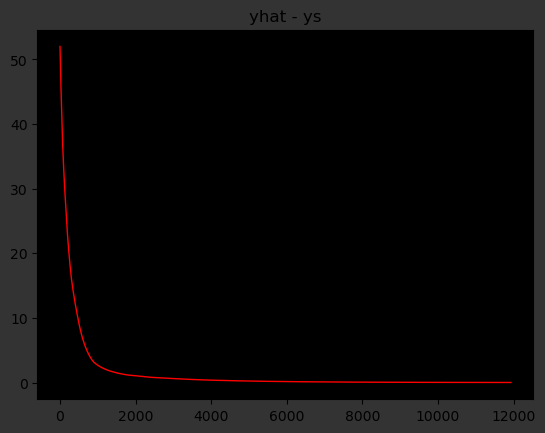

In [10]:
plt.plot(err,color='red', linewidth=1)
plt.title('yhat - ys')
plt.show()

In [11]:
yh

array([[5.00043651],
       [2.99998575],
       [3.0000321 ],
       [3.99998842],
       [4.00004955],
       [5.00018118],
       [4.00000429],
       [6.00028505],
       [4.00017513],
       [0.99998785],
       [1.00003822],
       [6.99139299],
       [1.99998761],
       [3.00010039],
       [2.99995985]])

In [12]:
ys

array([[5],
       [3],
       [3],
       [4],
       [4],
       [5],
       [4],
       [6],
       [4],
       [1],
       [1],
       [7],
       [2],
       [3],
       [3]])